In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols, glm

wine = pd.read_csv('附件1葡萄酒数据.csv')
wine.columns = wine.columns.str.replace(' ', "")
print(wine.head(10))

   非挥发性酸含量  挥发性酸含量  柠檬酸含量  残余糖分含量  氯化钠含量  游离二氧化硫含量  总二氧化硫含量       密度   酸碱度  \
0      9.1    0.27   0.45    10.6  0.035      28.0    124.0  0.99700  3.20   
1      7.4    0.24   0.36     2.0  0.031      27.0    139.0  0.99055  3.28   
2      7.1    0.26   0.49     2.2  0.032      31.0    113.0  0.99030  3.37   
3      8.2    0.22   0.36     6.8  0.034      12.0     90.0  0.99440  3.01   
4      8.1    0.17   0.44    14.1  0.053      43.0    145.0  1.00060  3.28   
5      8.1    0.17   0.44    14.1  0.053      43.0    145.0  1.00060  3.28   
6      8.1    0.27   0.35     1.7  0.030      38.0    103.0  0.99255  3.22   
7      8.0    0.45   0.36     8.8  0.026      50.0    151.0  0.99270  3.07   
8      8.0    0.44   0.49     9.1  0.031      46.0    151.0  0.99260  3.16   
9      8.0    0.34   0.49     9.0  0.033      39.0    180.0  0.99360  3.13   

   硫酸钾含量  酒精浓度  质量  
0   0.46  10.4   9  
1   0.48  12.5   9  
2   0.42  12.9   9  
3   0.38  10.5   8  
4   0.75   8.8   8  
5   0.75   8.8 

In [2]:
# 显示所有变量的描述性统计量
print(wine.describe())

           非挥发性酸含量       挥发性酸含量        柠檬酸含量       残余糖分含量        氯化钠含量  \
count  4878.000000  4878.000000  4878.000000  4878.000000  4878.000000   
mean      6.851281     0.278098     0.334227     6.395603     0.045791   
std       0.826863     0.100666     0.121023     5.073104     0.021865   
min       3.800000     0.080000     0.000000     0.600000     0.009000   
25%       6.300000     0.210000     0.270000     1.700000     0.036000   
50%       6.800000     0.260000     0.320000     5.200000     0.043000   
75%       7.300000     0.320000     0.390000     9.900000     0.050000   
max      11.800000     1.100000     1.660000    65.800000     0.346000   

          游离二氧化硫含量      总二氧化硫含量           密度          酸碱度        硫酸钾含量  \
count  4878.000000  4878.000000  4878.000000  4878.000000  4878.000000   
mean     35.332308   138.409287     0.994032     3.188278     0.489912   
std      17.016666    42.510872     0.002989     0.150412     0.113990   
min       2.000000     9.000000     0

In [7]:
# 找出唯一值
print(sorted(wine.质量.unique()))

[3, 4, 5, 6, 7, 8, 9]


In [8]:
print(wine.质量.value_counts())

6    2192
5    1457
7     874
8     173
4     163
3      16
9       3
Name: 质量, dtype: int64


In [9]:
'''
sns.set_style("dark")
print(sns.distplot(wine.quality, norm_hist=True, kde=False, color="red", label="wine"))

sns.utils.axlabel("Quality Score", "Density")
plt.title("Distribution of Quality by Wine Type")
plt.legend()
plt.show()
'''

'\nsns.set_style("dark")\nprint(sns.distplot(wine.quality, norm_hist=True, kde=False, color="red", label="wine"))\n\nsns.utils.axlabel("Quality Score", "Density")\nplt.title("Distribution of Quality by Wine Type")\nplt.legend()\nplt.show()\n'

In [11]:
# 计算所有变量的相关矩阵
print(wine.corr())

           非挥发性酸含量    挥发性酸含量     柠檬酸含量    残余糖分含量     氯化钠含量  游离二氧化硫含量  \
非挥发性酸含量   1.000000 -0.024207  0.288253  0.092097  0.021100 -0.049979   
挥发性酸含量   -0.024207  1.000000 -0.148417  0.066324  0.070066 -0.097560   
柠檬酸含量     0.288253 -0.148417  1.000000  0.095208  0.114947  0.094702   
残余糖分含量    0.092097  0.066324  0.095208  1.000000  0.088402  0.299158   
氯化钠含量     0.021100  0.070066  0.114947  0.088402  1.000000  0.101425   
游离二氧化硫含量 -0.049979 -0.097560  0.094702  0.299158  0.101425  1.000000   
总二氧化硫含量   0.087261  0.090741  0.120024  0.401461  0.198020  0.615984   
密度        0.265093  0.028645  0.148593  0.839884  0.256084  0.294433   
酸碱度      -0.421556 -0.031662 -0.162769 -0.194703 -0.088701  0.000410   
硫酸钾含量    -0.018733 -0.034934  0.061601 -0.026746  0.016556  0.058348   
酒精浓度     -0.116913  0.067303 -0.074137 -0.451226 -0.359012 -0.250293   
质量       -0.113012 -0.197501 -0.007832 -0.095356 -0.208437  0.007502   

           总二氧化硫含量        密度       酸碱度     硫酸钾含量      酒精浓度     

In [20]:
# 从红葡萄酒和白葡萄酒的数据中取出一个“小”样本来进行绘图
def take_sample(data_frame, replace=False, n=200):
    return data_frame.loc[np.random.choice(data_frame.index, replace=replace, size=n)]


wine_sample = take_sample(wine)
print(wine_sample)

      非挥发性酸含量  挥发性酸含量  柠檬酸含量  残余糖分含量  氯化钠含量  游离二氧化硫含量  总二氧化硫含量       密度   酸碱度  \
1601      7.3   0.430   0.37    4.60  0.028      17.0    114.0  0.99100  3.23   
3139      5.6   0.320   0.32    8.30  0.043      32.0    105.0  0.99266  3.24   
4680      5.2   0.600   0.07    7.00  0.044      33.0    147.0  0.99440  3.33   
343       7.4   0.160   0.30   13.70  0.056      33.0    168.0  0.99825  2.90   
3203      5.2   0.335   0.20    1.70  0.033      17.0     74.0  0.99002  3.34   
...       ...     ...    ...     ...    ...       ...      ...      ...   ...   
3939      6.9   0.190   0.38    1.15  0.023      30.0    105.0  0.99047  3.11   
3768      7.2   0.470   0.16    5.90  0.048      14.0    125.0  0.99428  3.09   
750       6.5   0.160   0.33    1.00  0.027      23.0     75.0  0.99080  3.30   
3142      5.6   0.320   0.33    7.40  0.037      25.0     95.0  0.99268  3.25   
4423      6.2   0.300   0.17    2.80  0.040      24.0    125.0  0.99390  3.01   

      硫酸钾含量  酒精浓度  质量  
160

In [ ]:
"""
whites_sample = take_sample(wine.loc[wine['type'] == 'white', :])
wine_sample = pd.concat([reds_sample, whites_sample])
wine['in_sample'] = np.where(wine.index.isin(wine_sample.index), 1., 0.)
print(pd.crosstab(wine.in_sample, margins=True))
"""

/opt/anaconda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 36136 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 37202 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 31934 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 27987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24230 missing from current

/opt/anaconda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 36136 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 37202 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 31934 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 27987 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 24230 missing from current font.
  f

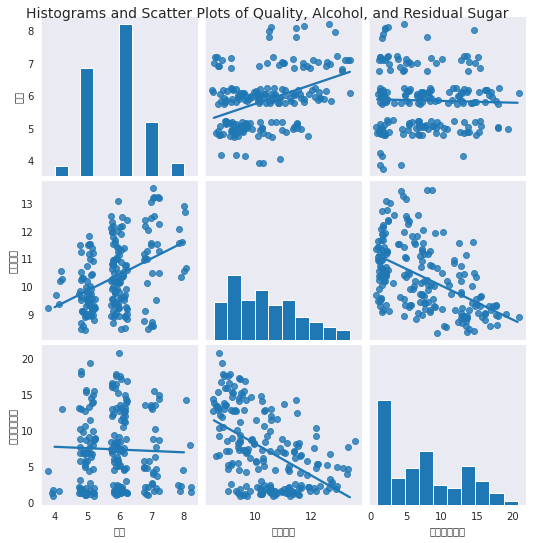

In [26]:
# 查看成对变量之间的关系
sns.set_style("dark")
g = sns.pairplot(wine_sample, kind='reg', plot_kws={"ci": False, "x_jitter": 0.25, "y_jitter": 0.25}, hue=None,
                 diag_kind='hist', diag_kws={"bins": 10, "alpha": 1.0}, palette=None, markers=None,
                 vars=['质量', '酒精浓度', '残余糖分含量'])
#seaborn的pairplot()函数可以创建一个统计图矩阵。主对角线上的图以直方图或密度图的形式显示了每个变量的单变量分布，对角线之外的图以散点图的形式显示了每两个变量之间的双变量分布，散点图中可以有回归直线，也可以没有。因为质量评分都是整数，所以加上一点振动可以更容易看出数据在何处集中。
print(g)
plt.suptitle('Histograms and Scatter Plots of Quality, Alcohol, and Residual Sugar', fontsize=14,
             horizontalalignment='center', verticalalignment='top', x=0.5, y=0.999)
plt.show()

In [30]:
my_formula = '质量 ~ 酒精浓度 + 氯化钠含量 + 柠檬酸含量 + 密度 + 非挥发性酸含量 + 游离二氧化硫含量 + 酸碱度 + 残余糖分含量 + 硫酸钾含量 + 总二氧化硫含量 + 挥发性酸含量'

lm = ols(my_formula, data=wine).fit()

# 或者，也可以使用广义线性模型（glm）语法进行线性回归
# lm = glm(my_formula, data=wine, family=sm.families.Gaussian()).fit()

print(lm.summary())
print("\nQuantities you can extract from the result:\n%s" % dir(lm))
print("Coefficients:\n%s" % lm.params)
print("Coefficient Std Errors:\n%s" % lm.bse)
print("\nAdj. R-squared:\n%.2f" % lm.rsquared_adj)
print("\nF-statistic: %.1f   P-value: %.2f" % (lm.fvalue, lm.f_pvalue))
print("\nNumber of obs: %d   Number of fitted values: %d" % (lm.nobs, len(lm.fittedvalues)))



                            OLS Regression Results                            
Dep. Variable:                     质量   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     175.5
Date:                Sun, 01 May 2022   Prob (F-statistic):               0.00
Time:                        20:24:37   Log-Likelihood:                -5479.2
No. Observations:                4878   AIC:                         1.098e+04
Df Residuals:                    4866   BIC:                         1.106e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    153.3431     18.840      8.139      0.0